In [1]:
import torch
import seaborn as sns
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

import IPython
from mpl_toolkits import axes_grid1

from IPython.display import IFrame


In [ ]:
%matplotlib notebook


In [3]:
%matplotlib inline


In [4]:
sns.set_theme()

In [6]:
cka = torch.load("../cka_vals.pt")

cka = pd.DataFrame(cka)

epoch               layer_i               layer_j   cka_val
0          0  block1.layer.0.relu1  block1.layer.0.relu1  0.990465
1          0  block1.layer.0.relu1  block1.layer.0.relu2  0.977371
2          0  block1.layer.0.relu1  block1.layer.1.relu1  0.978156
3          0  block1.layer.0.relu1  block1.layer.1.relu2  0.972707
4          0  block1.layer.0.relu1  block1.layer.2.relu1  0.980787
...      ...                   ...                   ...       ...
62495     99                  relu  block3.layer.2.relu1  0.653280
62496     99                  relu  block3.layer.2.relu2  0.643403
62497     99                  relu  block3.layer.3.relu1  0.640776
62498     99                  relu  block3.layer.3.relu2  0.628479
62499     99                  relu                  relu  0.585313

[62500 rows x 4 columns]

In [12]:
penguins = sns.load_dataset("penguins")

In [ ]:
sns.displot(
    cka, x="cka_val", col="epoch",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [25]:
acts1_all = torch.load("../acts_normal.pt")
acts2_all = torch.load("../acts_shuffled.pt")

In [49]:
avg_acts1 = np.mean(acts1, axis=(2,3))

In [50]:
avg_acts2 = np.mean(acts2, axis=(1,2))

In [52]:
import cca_np

In [54]:
a_results = cca_np.get_cca_similarity(avg_acts1.T, avg_acts2.T, epsilon=1e-10, verbose=False)

In [56]:
a_results["cca_coef1"]

array([0.99999999, 0.99525729, 0.97677779, 0.94527659, 0.90352289,
       0.87789364, 0.75532522, 0.71116207, 0.59998607, 0.5793339 ,
       0.4771041 , 0.4374622 , 0.35055048, 0.19892628, 0.15844106,
       0.04788825])

In [57]:
def _plot_helper(arr, xlabel, ylabel):
    plt.plot(arr, lw=2.0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()


In [58]:
a_results.keys()

dict_keys(['coef_x', 'invsqrt_xx', 'full_coef_x', 'full_invsqrt_xx', 'coef_y', 'invsqrt_yy', 'full_coef_y', 'full_invsqrt_yy', 'neuron_means1', 'neuron_means2', 'cca_coef1', 'cca_coef2', 'x_idxs', 'y_idxs', 'mean', 'sum'])

In [96]:

# GIF link used as IFrame

# resized output IFrame
# IFrame(src=iframe_url, width=600, height=550)

In [ ]:
#         fig, ax = plt.subplots()
#         im = ax.imshow(self.hsic_matrix, origin="lower", cmap="magma")
#         ax.set_xlabel(f"Layers {self.model2_info['Name']}", fontsize=15)
#         ax.set_ylabel(f"Layers {self.model1_info['Name']}", fontsize=15)

#         if title is not None:
#             ax.set_title(f"{title}", fontsize=18)
#         else:
#             ax.set_title(f"{self.model1_info['Name']} vs {self.model2_info['Name']}", fontsize=18)

#         add_colorbar(im)
#         plt.tight_layout()

In [94]:
cka_all = torch.load("../cka_all.pt")

In [170]:
%matplotlib inline


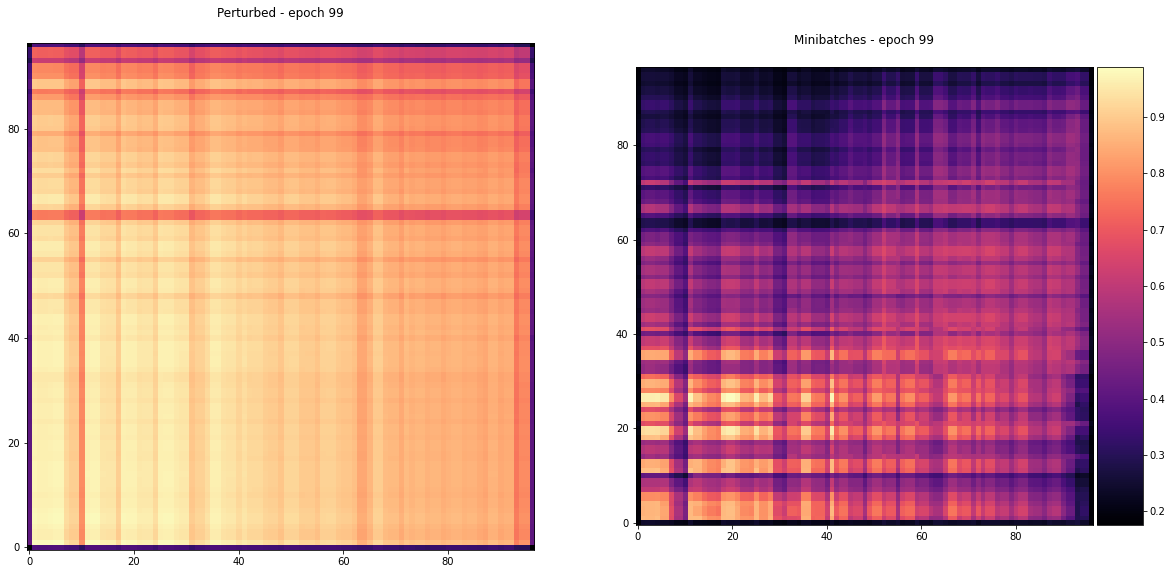

In [7]:
cka_all_mb = torch.load("../cka_all_minibatches_dropdropall.pt", map_location="cpu")
cka_all_p = torch.load("../cka_all_perturbdropall.pt", map_location="cpu")





fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# div0 = axes_grid1.make_axes_locatable(ax[0])
# cax0 = div.append_axes("right", "5%", "5%")

# div1 = axes_grid1.make_axes_locatable(ax[1])
# cax1 = div.append_axes('right', .10)

container = []
for ((idx, cka_mb), (_, cka_p)) in zip(cka_all_mb.items(), cka_all_p.items()):
    im_0 = ax[0].imshow(cka_p, origin="lower", cmap="magma", interpolation='None')
    im_1 = ax[1].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    
    # fig.colorbar(im_1, cax=cax1)
    
    
    title0 = ax[0].text(0.5,1.05,"Perturbed - epoch {}".format(idx), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax[0].transAxes, )
    
    title1 = ax[1].text(0.5,1.05,"Minibatches - epoch {}".format(idx), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1].transAxes, )

    container.append([im_0, title0, im_1, title1])
    

divider = axes_grid1.make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    
# im_1.axes.figure.colorbar(im_1, cax=cax1)
# plt.colorbar(im_1)
# plt.show()

# cv0 = container[0][0]
# im = ax[0].imshow(cv0, origin="lower")
# cb = fig.colorbar(cv0, cax=cax0)
# cb = fig.colorbar(im_0, cax=cax0)
ani = animation.ArtistAnimation(fig, container, interval=100, blit=False,
                                repeat_delay=1000)

ani.save("test.gif")

IFrame(src="test.gif", width=2000, height=1000)


In [179]:
cv0

In [118]:
# import matplotlib.pyplot as plt
# from matplotlib import animation
# import numpy as np

# a = np.random.rand(10,10)

# fig, ax=plt.subplots()
# container = []

# for i in range(a.shape[1]):
#     line, = ax.plot(a[:,i])
#     title = ax.text(0.5,1.05,"Title {}".format(i), 
#                     size=plt.rcParams["axes.titlesize"],
#                     ha="center", transform=ax.transAxes, )
#     container.append([line, title])

# ani = animation.ArtistAnimation(fig, container, interval=200, blit=False)

# ani.save("test.gif")
# IFrame(src="test.gif", width=600, height=550)



In [66]:
from experiments.models_wideresnet import WideResNet


In [77]:
cka_all.idd

torch.Size([97, 97])

In [54]:
cka_svd = torch.load("../cka_svd.pt")

In [19]:
cka_svd.vals = dict(cka_svd.vals)

In [24]:
cka_svd.vals['normal'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [55]:
layer_tracker = {}
for epoch, layer_vals_for_epoch in cka_svd.cka_vals["normal"].items():
    for layer, val in layer_vals_for_epoch.items():
        layer_d = layer_tracker.get(layer, [])
        layer_d.append(val)
        
        layer_tracker[layer] = layer_d
    
    # layer_tracker[layer]


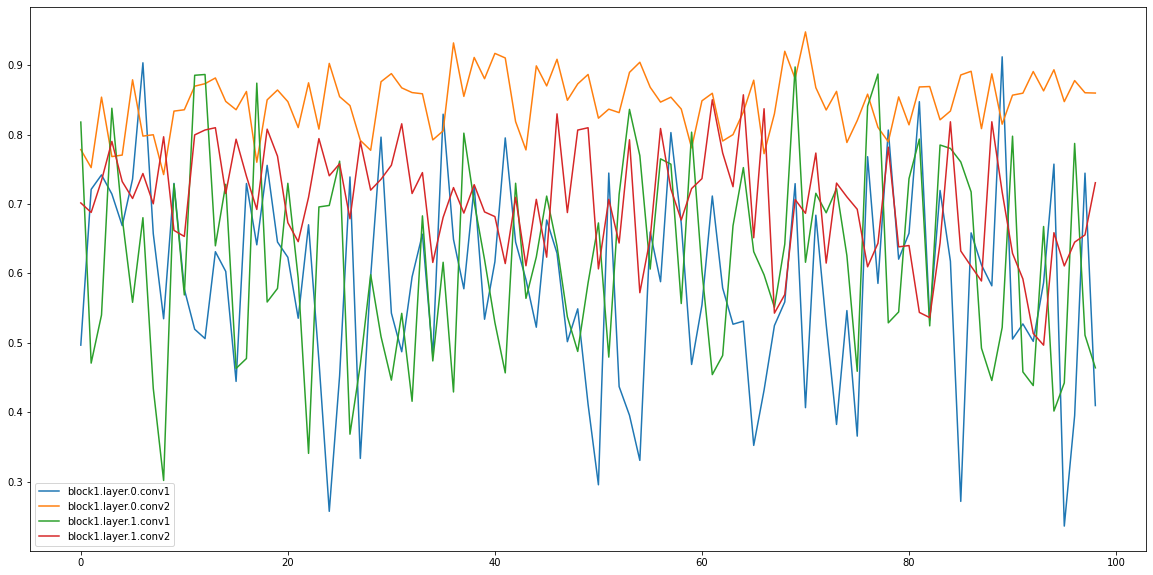

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

layers_to_plot = ['block1.layer.0.relu1', 'block2.layer.2.relu1', 'block1.layer.3.relu1', 'relu']
layers_to_plot = ['block1', 'block2', 'block3', 'relu']
layers_to_plot = ['block1.layer.0.conv1', 'block1.layer.0.conv2', 'block1.layer.1.conv1', 'block1.layer.1.conv2']

# for layer, vals in layer_tracker.items():
for layer in layers_to_plot:
    vals = layer_tracker[layer]
    ax.plot(vals, label=layer)
    
ax.legend()
plt.show()

In [50]:
layer_tracker.keys()

dict_keys(['conv1', 'block1', 'block1.layer', 'block1.layer.0', 'block1.layer.0.bn1', 'block1.layer.0.relu1', 'block1.layer.0.conv1', 'block1.layer.0.bn2', 'block1.layer.0.relu2', 'block1.layer.0.conv2', 'block1.layer.1', 'block1.layer.1.bn1', 'block1.layer.1.relu1', 'block1.layer.1.conv1', 'block1.layer.1.bn2', 'block1.layer.1.relu2', 'block1.layer.1.conv2', 'block1.layer.2', 'block1.layer.2.bn1', 'block1.layer.2.relu1', 'block1.layer.2.conv1', 'block1.layer.2.bn2', 'block1.layer.2.relu2', 'block1.layer.2.conv2', 'block1.layer.3', 'block1.layer.3.bn1', 'block1.layer.3.relu1', 'block1.layer.3.conv1', 'block1.layer.3.bn2', 'block1.layer.3.relu2', 'block1.layer.3.conv2', 'block2', 'block2.layer', 'block2.layer.0', 'block2.layer.0.bn1', 'block2.layer.0.relu1', 'block2.layer.0.conv1', 'block2.layer.0.bn2', 'block2.layer.0.relu2', 'block2.layer.0.conv2', 'block2.layer.0.convShortcut', 'block2.layer.1', 'block2.layer.1.bn1', 'block2.layer.1.relu1', 'block2.layer.1.conv1', 'block2.layer.1.bn2

In [4]:
cka_only_diag = torch.load("../cka_diag.pt")

In [8]:
cka_only_diag[1].diag()

tensor([0.5767, 0.6393, 0.6393, 0.4968, 0.6297, 0.6297, 0.7784, 0.7876, 0.7876,
        0.8180, 0.7675, 0.7675, 0.7016, 0.8550, 0.8550, 0.7852, 0.8301, 0.8301,
        0.7119, 0.7162, 0.7162, 0.6186, 0.8544, 0.8544, 0.7726, 0.7380, 0.7380,
        0.8042, 0.8283, 0.8283, 0.6374, 0.7398, 0.8016, 0.8016, 0.5639, 0.7506,
        0.7506, 0.5794, 0.7441, 0.7441, 0.7558, 0.7228, 0.7228, 0.6294, 0.7637,
        0.7637, 0.7956, 0.7912, 0.7912, 0.7070, 0.7446, 0.7446, 0.6700, 0.7040,
        0.7040, 0.5072, 0.7677, 0.6720, 0.6720, 0.6109, 0.4930, 0.4930, 0.3815,
        0.6800, 0.6800, 0.6437, 0.6134, 0.6134, 0.5081, 0.5022, 0.5022, 0.4699,
        0.5595, 0.5595, 0.4169, 0.5004, 0.5004, 0.0000])

In [16]:

container = []
for ((idx, cka_mb), (_, cka_p)) in zip(cka_all_mb.items(), cka_all_p.items()):
    im_0 = ax[0].imshow(cka_p, origin="lower", cmap="magma", interpolation='None')
    im_1 = ax[1].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    
    # fig.colorbar(im_1, cax=cax1)
    
    
    title0 = ax[0].text(0.5,1.05,"Perturbed - epoch {}".format(idx), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax[0].transAxes, )
    
    title1 = ax[1].text(0.5,1.05,"Minibatches - epoch {}".format(idx), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1].transAxes, )

    container.append([im_0, title0, im_1, title1])
    

divider = axes_grid1.make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    
# im_1.axes.figure.colorbar(im_1, cax=cax1)
# plt.colorbar(im_1)
# plt.show()

# cv0 = container[0][0]
# im = ax[0].imshow(cv0, origin="lower")
# cb = fig.colorbar(cv0, cax=cax0)
# cb = fig.colorbar(im_0, cax=cax0)
ani = animation.ArtistAnimation(fig, container, interval=100, blit=False,
                                repeat_delay=1000)

ani.save("test.gif")

IFrame(src="test.gif", width=600, height=550)

array([0.576696  , 0.6393034 , 0.6393034 , 0.49683008, 0.62968785,
       0.62968785, 0.7783982 , 0.78760314, 0.78760314, 0.8180177 ,
       0.76754975, 0.76754975, 0.7016047 , 0.8550215 , 0.8550215 ,
       0.7852016 , 0.8300655 , 0.8300655 , 0.71190083, 0.7161957 ,
       0.7161957 , 0.6186058 , 0.85437626, 0.85437626, 0.77257574,
       0.7380205 , 0.7380205 , 0.8042435 , 0.82828194, 0.82828194,
       0.6374123 , 0.7397754 , 0.80160844, 0.80160844, 0.56392723,
       0.7506249 , 0.7506249 , 0.5793836 , 0.74413276, 0.74413276,
       0.75575936, 0.7227935 , 0.7227935 , 0.62941647, 0.76368475,
       0.76368475, 0.7955732 , 0.79119384, 0.79119384, 0.7070246 ,
       0.7445791 , 0.7445791 , 0.6699609 , 0.70397425, 0.70397425,
       0.50722593, 0.7676876 , 0.6720201 , 0.6720201 , 0.6109066 ,
       0.49303693, 0.49303693, 0.38148704, 0.6799962 , 0.6799962 ,
       0.6437047 , 0.6133985 , 0.6133985 , 0.50814193, 0.50224864,
       0.50224864, 0.46991852, 0.55951506, 0.55951506, 0.41688

In [22]:
cka_only_diag.items()

dict_items([(1, tensor([[0.5767, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6393, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6393,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5004, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.5004, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])), (2, tensor([[0.0381, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6069, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6069,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.6935, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6935, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])), (3, tensor([[-0.0024,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.8083,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.8083, 

<BarContainer object of 78 artists>

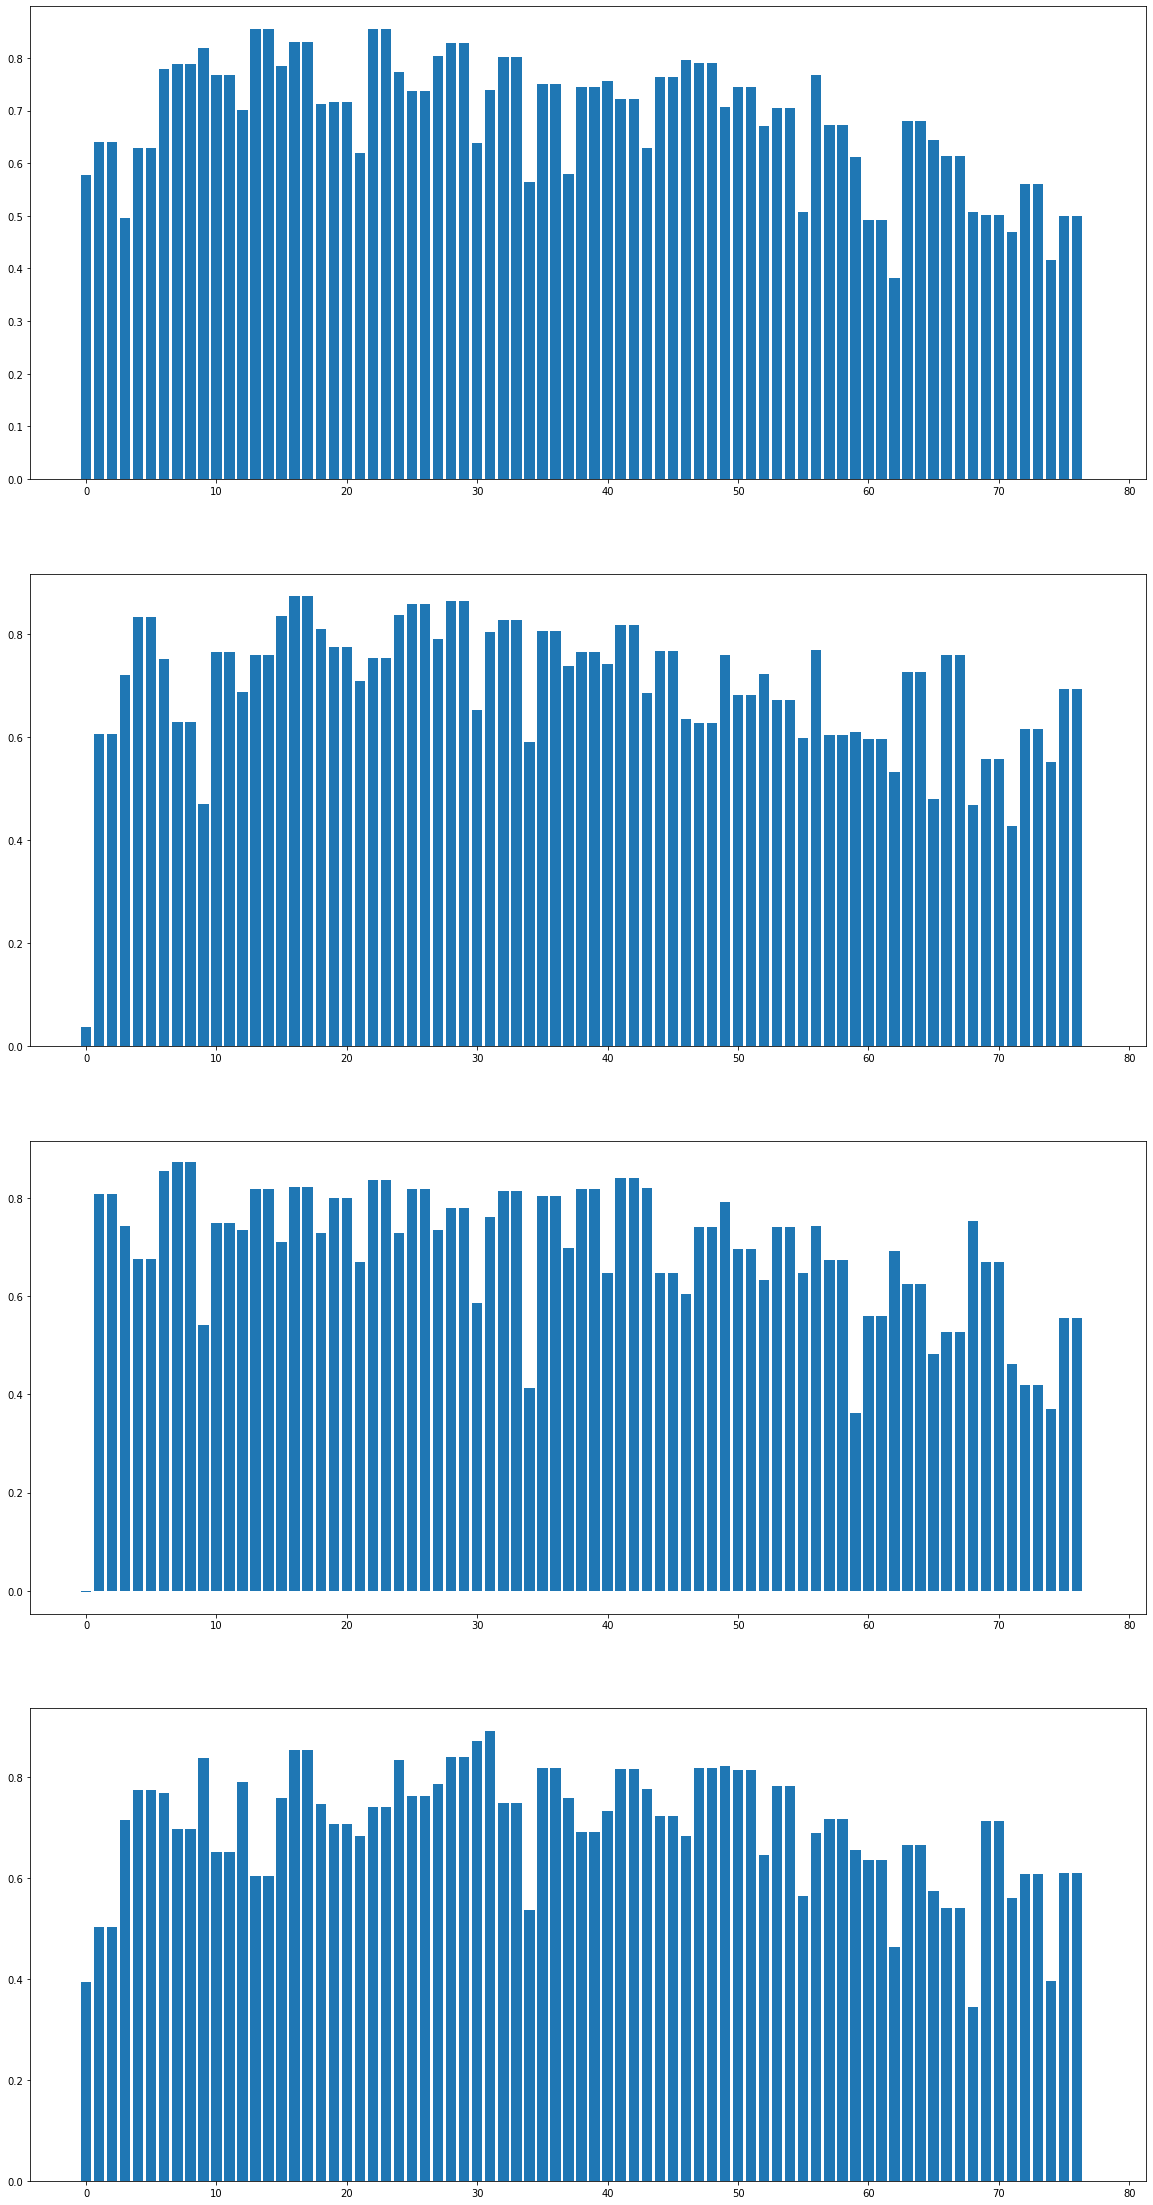

In [43]:
fig, ax = plt.subplots(4, 1, figsize=(20,40))
diag1= cka_only_diag[1].diag().numpy()
diag2= cka_only_diag[2].diag().numpy()
diag3= cka_only_diag[3].diag().numpy()
diag4= cka_only_diag[4].diag().numpy()
num_diags = range(len(diag1))

ax[0].bar(num_diags, diag1)
ax[1].bar(num_diags, diag2)
ax[2].bar(num_diags, diag3)
ax[3].bar(num_diags, diag4)


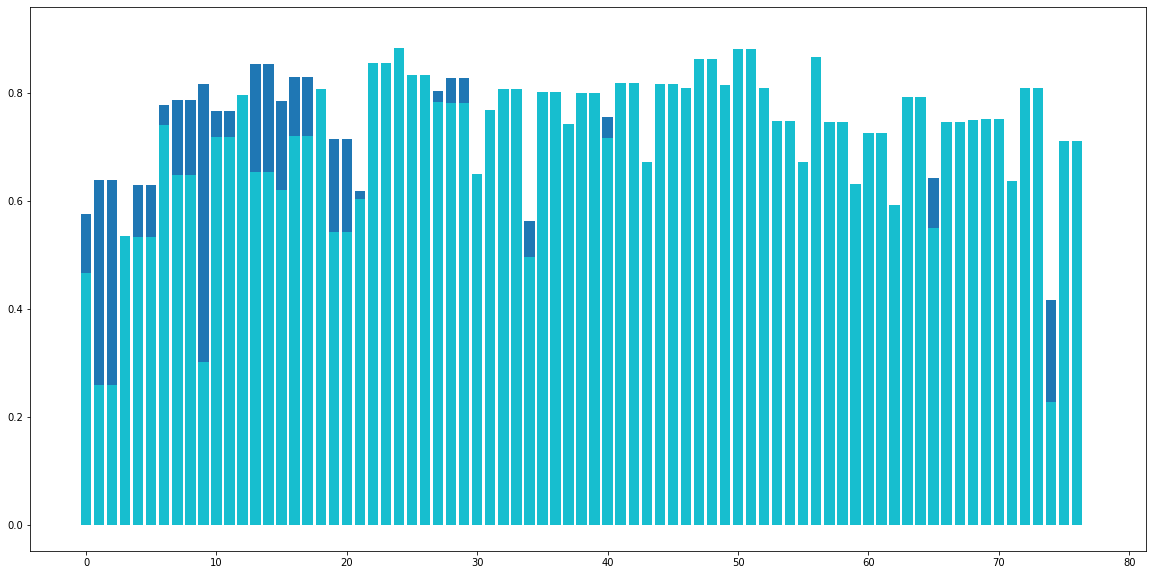

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(list(range(len(cka_only_diag[1].diag().numpy()))), cka_only_diag[1].diag().numpy())



container = []
for epoch_idx, cka in cka_only_diag.items():
    diag_vals = cka.diag().numpy()
    im = ax.bar(list(range(len(diag_vals))), diag_vals)
    container.append(im)
    

    
    # fig.colorbar(im_1, cax=cax1)
    
    
#     title0 = ax[0].text(0.5,1.05,"Perturbed - epoch {}".format(idx), 
#                 size=plt.rcParams["axes.titlesize"],
#                 ha="center", transform=ax[0].transAxes, )
    
#     title1 = ax[1].text(0.5,1.05,"Minibatches - epoch {}".format(idx), 
#                     size=plt.rcParams["axes.titlesize"],
#                     ha="center", transform=ax[1].transAxes, )

#     container.append([im_0, title0, im_1, title1])
    

# divider = axes_grid1.make_axes_locatable(ax[1])
# cax = divider.append_axes('right', size='10%', pad=0.05)
# fig.colorbar(im_0, cax=cax, orientation='vertical')
    
# im_1.axes.figure.colorbar(im_1, cax=cax1)
# plt.colorbar(im_1)
# plt.show()

# cv0 = container[0][0]
# im = ax[0].imshow(cv0, origin="lower")
# cb = fig.colorbar(cv0, cax=cax0)
# cb = fig.colorbar(im_0, cax=cax0)
ani = animation.ArtistAnimation(fig, container, interval=100, blit=False,
                                repeat_delay=1000)

ani.save("test.gif")

# IFrame(src="test.gif", width=1500, height=900)

In [41]:
plt.show(container[0])

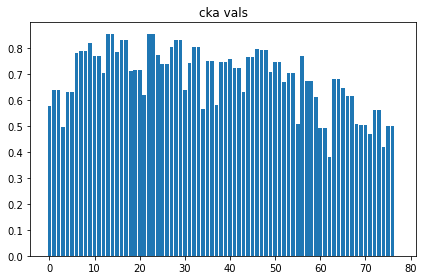

In [38]:
# fig = plt.figure()
# ax = fig.add_subplot()

# plt.title('cka vals')

# cka_vals_1 = cka_only_diag[1].diag().numpy()

# bar = ax.bar(range(len(cka_vals_1)), cka_vals_1, align='center')
# # plt.xticks(range(len(cka_vals_1)), list(counter_data.keys()))
# plt.tight_layout()
# # plt.ylim((0, 30))


# def animate(i):
#     # data = list(counter_data.values())
#     # for i in range(len(data)):
#     for idx, cka_val in enumerate(cka_vals[val+1].values()):
#         bar[idx].set_height(cka_val)

# animation.FuncAnimation(fig, func=animate, frames=8, fargs=[cka_only_diag], save_count=10)

In [53]:
cka_svd_ = torch.load("../cka_svd.pt")

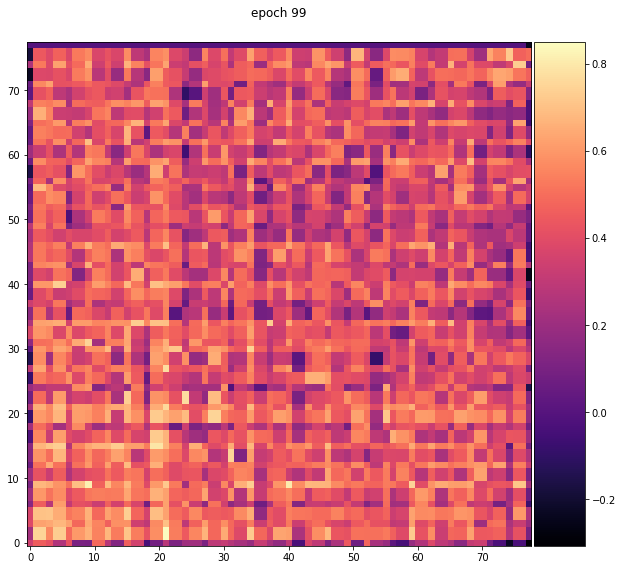

In [61]:

cka_svd = cka_svd_.cka_vals["normal"]
# cka_all_p = torch.load("../cka_all_perturbdropall.pt")





fig, ax = plt.subplots(1, 1, figsize=(10, 10))


container = []
for epoch, cka_ in cka_svd.items():
    im_0 = ax.imshow(cka_, origin="lower", cmap="magma", interpolation='None')
    # im_1 = ax[1].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    
    
    title0 = ax.text(0.5,1.05,"epoch {}".format(epoch), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax.transAxes, )
    
    container.append([im_0, title0])
    

divider = axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    

ani = animation.ArtistAnimation(fig, container, interval=500, blit=False,
                                repeat_delay=1000)

ani.save("not_symmetric.gif")

IFrame(src="not_symmetric.gif", width=1000, height=1000)


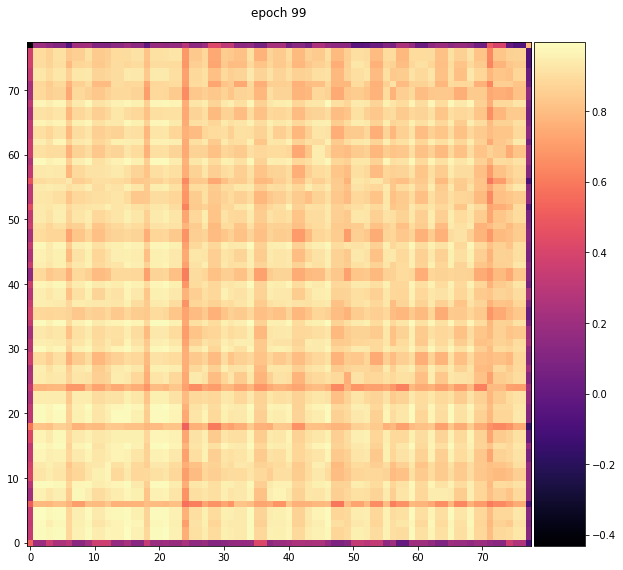

In [62]:
cka_svd_ = torch.load("../cka_svd.pt", map_location="cpu")

cka_svd = cka_svd_.cka_vals["normal"]
# cka_all_p = torch.load("../cka_all_perturbdropall.pt")





fig, ax = plt.subplots(1, 1, figsize=(10, 10))


container = []
for epoch, cka_ in cka_svd.items():
    im_0 = ax.imshow(cka_, origin="lower", cmap="magma", interpolation='None')
    # im_1 = ax[1].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    
    
    title0 = ax.text(0.5,1.05,"epoch {}".format(epoch), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax.transAxes, )
    
#     title1 = ax[1].text(0.5,1.05,"Minibatches - epoch {}".format(idx), 
#                     size=plt.rcParams["axes.titlesize"],
#                     ha="center", transform=ax[1].transAxes, )

    container.append([im_0, title0])
    

divider = axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    

ani = animation.ArtistAnimation(fig, container, interval=500, blit=False,
                                repeat_delay=1000)

ani.save("symmetric.gif")

IFrame(src="symmetric.gif", width=1000, height=1000)


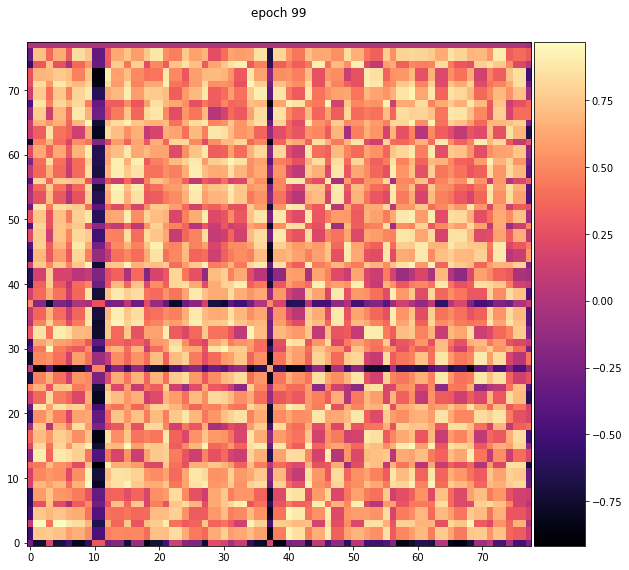

In [4]:
cka_svd = torch.load("../cka_perturb.pt", map_location="cpu").cka_vals["normal"]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))


container = []
for epoch, cka_ in cka_svd.items():
    im_0 = ax.imshow(cka_, origin="lower", cmap="magma", interpolation='None')
    # im_1 = ax[1].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    
    
    title0 = ax.text(0.5,1.05,"epoch {}".format(epoch), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax.transAxes, )

    container.append([im_0, title0])
    

divider = axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    

ani = animation.ArtistAnimation(fig, container, interval=1000, blit=False,
                                repeat_delay=1000)

ani.save("perturbed_not_sym.gif")

IFrame(src="perturbed_not_sym.gif", width=1000, height=1000)


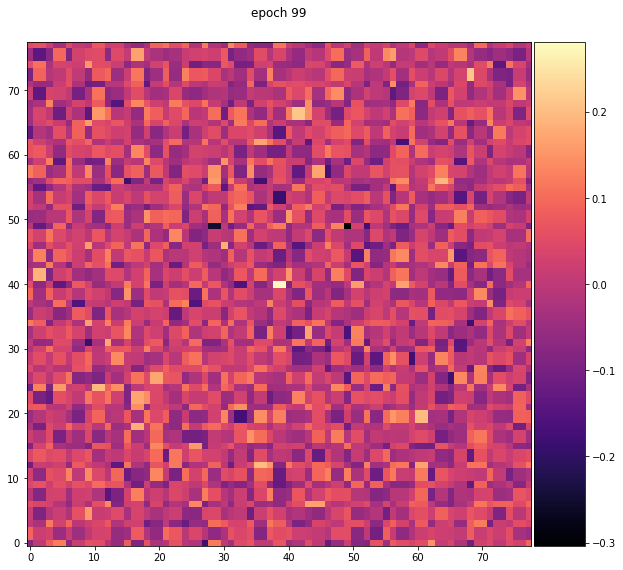

In [8]:
cka_svd = torch.load("../cka_perturb_symmetric.pt", map_location="cpu").cka_vals["normal"]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))


container = []
for epoch, cka_ in cka_svd.items():
    im_0 = ax.imshow(cka_, origin="lower", cmap="magma", interpolation='None')
    # im_1 = ax[1].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    
    
    title0 = ax.text(0.5,1.05,"epoch {}".format(epoch), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax.transAxes, )

    container.append([im_0, title0])
    

divider = axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    

ani = animation.ArtistAnimation(fig, container, interval=750, blit=False,
                                repeat_delay=1000)

ani.save("perturbed_sym.gif")

IFrame(src="perturbed_sym.gif", width=1000, height=1000)


In [2]:
hsic_cka = torch.load("../runs/cifar10/wideresnet/epoch_hsic_cka.pt",  map_location="cpu")
hsic_cka_svd = torch.load("../runs/cifar10/wideresnet/epoch_hsic_cka_svd.pt", map_location="cpu")

In [9]:
hsic_cka[1].shape
hsic_cka_svd[1].shape

torch.Size([78, 78])

In [10]:
hsic_cka[1][0, 5], hsic_cka_svd[1][0, 5] 

(tensor(0.8519), tensor(0.8854))

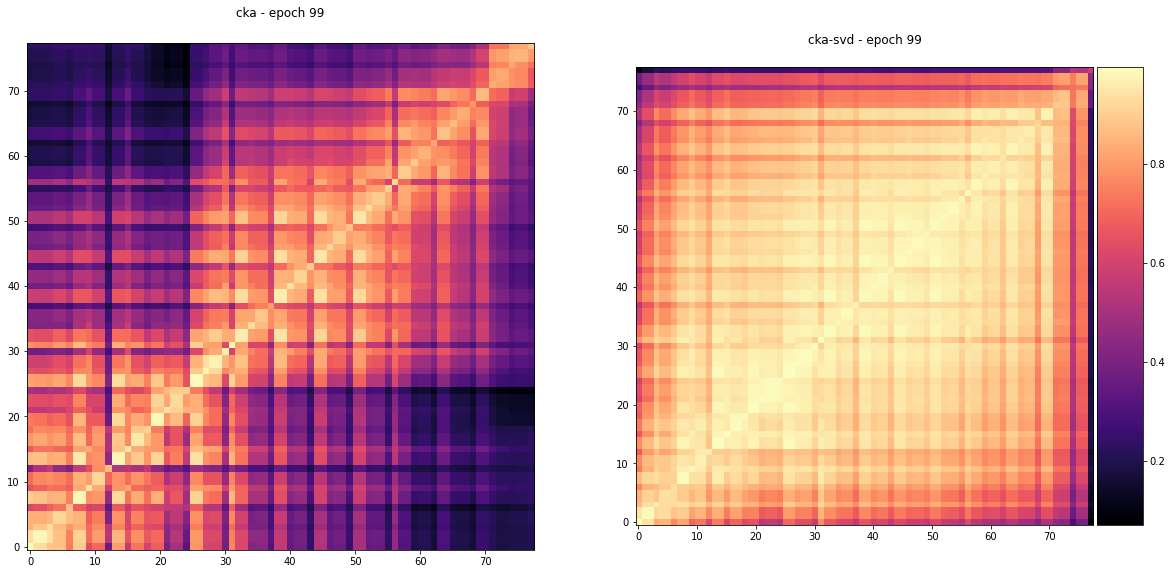

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# div0 = axes_grid1.make_axes_locatable(ax[0])
# cax0 = div.append_axes("right", "5%", "5%")

# div1 = axes_grid1.make_axes_locatable(ax[1])
# cax1 = div.append_axes('right', .10)

container = []
for ((idx_i, cka_mb), (idx_j, cka_svd)) in zip(hsic_cka.items(), hsic_cka_svd.items()):
    im_0 = ax[0].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    im_1 = ax[1].imshow(cka_svd, origin="lower", cmap="magma", interpolation='None')
        
    
    title0 = ax[0].text(0.5,1.05,"cka - epoch {}".format(idx_i), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax[0].transAxes, )
    
    title1 = ax[1].text(0.5,1.05,"cka-svd - epoch {}".format(idx_j), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1].transAxes, )

    container.append([im_0, title0, im_1, title1])
    

divider = axes_grid1.make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    
ani = animation.ArtistAnimation(fig, container, interval=100, blit=False,
                                repeat_delay=1000)

ani.save("cka_mb_vs_cka_svd.gif")

IFrame(src="cka_mb_vs_cka_svd.gif", width=2000, height=1000)

In [23]:
vals = []
# for i in range(len(hsic_cka)):

vals = [torch.norm(hsic_cka[i] - hsic_cka_svd[i]) for i in range(1, len(hsic_cka)+1)]

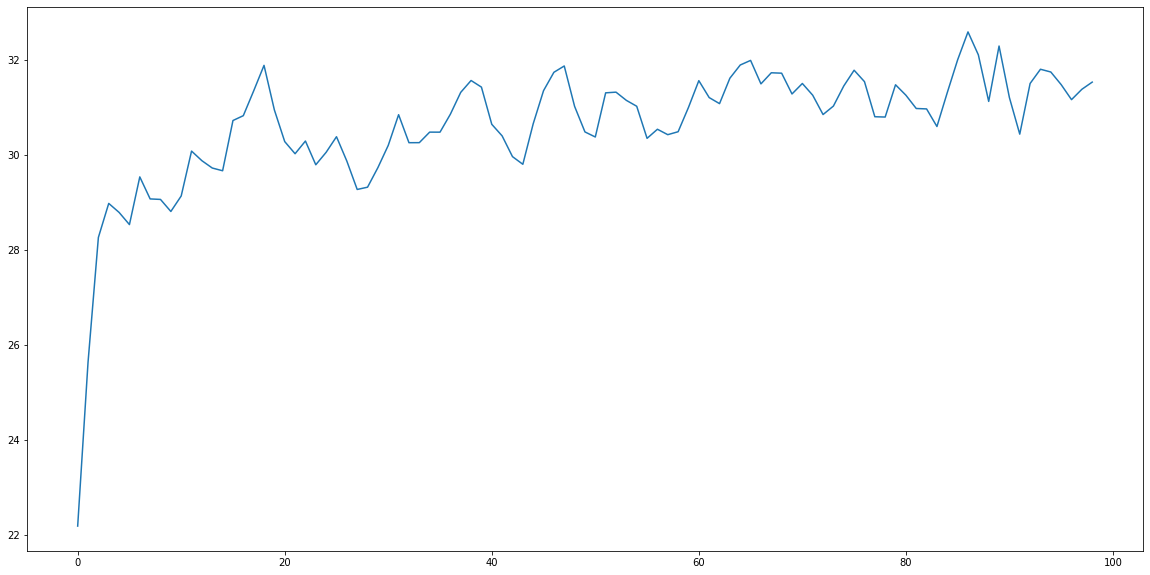

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(vals)

In [27]:
hsic_cka[99]

tensor([[0.9948, 0.9277, 0.9277,  ..., 0.1930, 0.1930, 0.2071],
        [0.9359, 0.9805, 0.9805,  ..., 0.1901, 0.1901, 0.2010],
        [0.9359, 0.9805, 0.9805,  ..., 0.1901, 0.1901, 0.2010],
        ...,
        [0.2015, 0.2053, 0.2053,  ..., 0.8512, 0.8512, 0.8002],
        [0.2015, 0.2053, 0.2053,  ..., 0.8512, 0.8512, 0.8002],
        [0.2218, 0.2243, 0.2243,  ..., 0.8256, 0.8256, 0.8801]])

In [34]:
hsic_cka_svd[99]

tensor([[0.9964, 0.9599, 0.9599,  ..., 0.5635, 0.5635, 0.3338],
        [0.9624, 0.9923, 0.9923,  ..., 0.6372, 0.6372, 0.3723],
        [0.9624, 0.9923, 0.9923,  ..., 0.6372, 0.6372, 0.3723],
        ...,
        [0.5487, 0.6166, 0.6166,  ..., 0.8728, 0.8728, 0.5994],
        [0.5487, 0.6166, 0.6166,  ..., 0.8728, 0.8728, 0.5994],
        [0.3662, 0.4109, 0.4109,  ..., 0.6581, 0.6581, 0.7014]])

In [32]:
hsic_cka_svd[99][0, :]

tensor([0.9964, 0.9599, 0.9599, 0.8828, 0.8949, 0.8949, 0.8348, 0.8755, 0.8755,
        0.7859, 0.8070, 0.8070, 0.7307, 0.8141, 0.8141, 0.7241, 0.7829, 0.7829,
        0.7304, 0.7473, 0.7473, 0.6692, 0.6876, 0.6876, 0.6642, 0.7889, 0.7889,
        0.7412, 0.7379, 0.7379, 0.6939, 0.8367, 0.7631, 0.7631, 0.7325, 0.7202,
        0.7202, 0.6845, 0.7531, 0.7531, 0.7074, 0.7243, 0.7243, 0.6807, 0.7320,
        0.7320, 0.6993, 0.7005, 0.7005, 0.6876, 0.7265, 0.7265, 0.6926, 0.6845,
        0.6845, 0.6594, 0.7305, 0.6749, 0.6749, 0.6471, 0.6500, 0.6500, 0.6308,
        0.6644, 0.6644, 0.6361, 0.6286, 0.6286, 0.5839, 0.6514, 0.6514, 0.6072,
        0.5932, 0.5932, 0.4846, 0.5635, 0.5635, 0.3338])

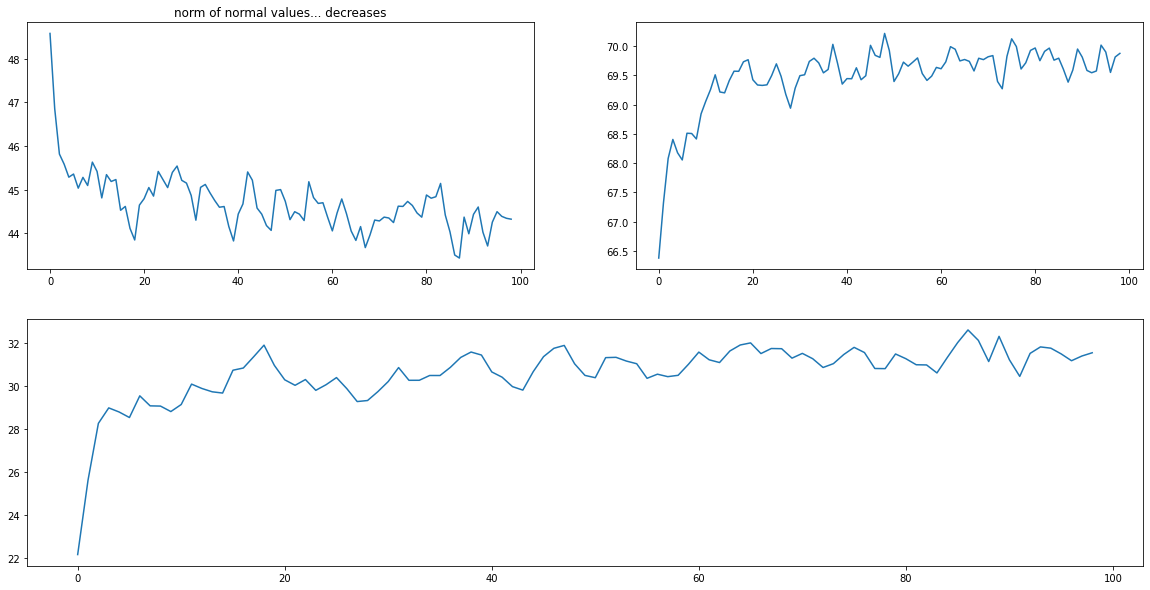

In [41]:
vals = []
# for i in range(len(hsic_cka)):

# vals = [torch.norm(hsic_cka[i]) for i in range(1, len(hsic_cka)+1)]
# fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# ax.plot(vals)
# ax.set_title("norm of normal values... decreases")

plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2,2,1)
ax1.plot([torch.norm(val) for val in hsic_cka.values()])
ax1.set_title("norm of normal values... decreases")

ax2 = plt.subplot(2,2,2)
ax2.set_title("meanwhile the svd of cka")
ax2.plot([torch.norm(val) for val in hsic_cka_svd.values()])


ax3 = plt.subplot(2,1,2)

ax3.plot([torch.norm(val1 - val2) for val1, val2 in zip(hsic_cka.values(), hsic_cka_svd.values())])
ax3.set_title("norm of difference between the CKA values... ")
axes = [ax1, ax2, ax3]

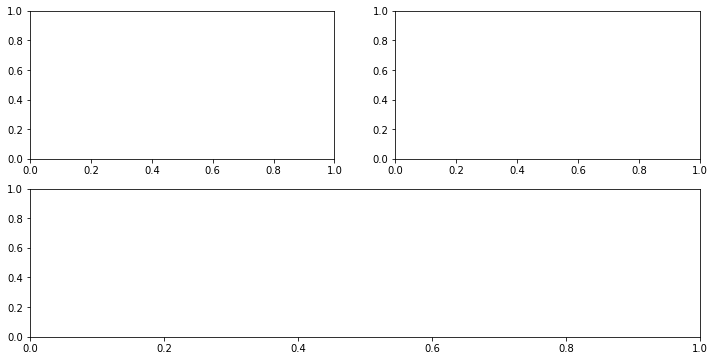

In [39]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
# ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax4]

In [ ]:
def plot_both

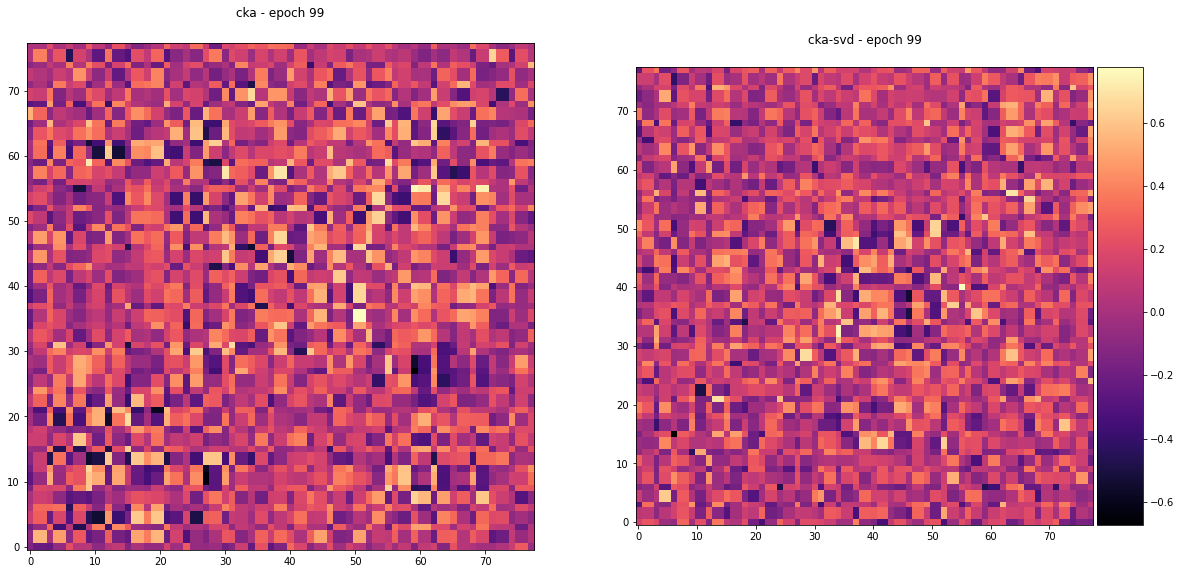

In [46]:
cka_train = torch.load("../runs/cifar10/wideresnet/epoch_cka_svd_perturbed_train.pt",  map_location="cpu")
cka_test = torch.load("../runs/cifar10/wideresnet/epoch_cka_svd_perturbed_test.pt", map_location="cpu")

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# div0 = axes_grid1.make_axes_locatable(ax[0])
# cax0 = div.append_axes("right", "5%", "5%")

# div1 = axes_grid1.make_axes_locatable(ax[1])
# cax1 = div.append_axes('right', .10)

container = []
for ((idx_i, cka_mb), (idx_j, cka_svd)) in zip(cka_train.items(), cka_test.items()):
    im_0 = ax[0].imshow(cka_mb, origin="lower", cmap="magma", interpolation='None')
    im_1 = ax[1].imshow(cka_svd, origin="lower", cmap="magma", interpolation='None')
        
    
    title0 = ax[0].text(0.5,1.05,"cka - epoch {}".format(idx_i), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax[0].transAxes, )
    
    title1 = ax[1].text(0.5,1.05,"cka-svd - epoch {}".format(idx_j), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1].transAxes, )

    container.append([im_0, title0, im_1, title1])
    

divider = axes_grid1.make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    
ani = animation.ArtistAnimation(fig, container, interval=750, blit=False,
                                repeat_delay=1000)

ani.save("cka_train_vs_test.gif")

IFrame(src="cka_train_vs_test.gif", width=2000, height=1000)

In [52]:
layers = ['conv1', 'block1.layer.0.bn1', 'block1.layer.0.relu1', 'block1.layer.0.conv1', 'block1.layer.0.bn2', 'block1.layer.0.relu2', 'block1.layer.0.conv2', 'block1.layer.1.bn1', 'block1.layer.1.relu1', 'block1.layer.1.conv1', 'block1.layer.1.bn2', 'block1.layer.1.relu2', 'block1.layer.1.conv2', 'block1.layer.2.bn1', 'block1.layer.2.relu1', 'block1.layer.2.conv1', 'block1.layer.2.bn2', 'block1.layer.2.relu2', 'block1.layer.2.conv2', 'block1.layer.3.bn1', 'block1.layer.3.relu1', 'block1.layer.3.conv1', 'block1.layer.3.bn2', 'block1.layer.3.relu2', 'block1.layer.3.conv2', 'block2.layer.0.bn1', 'block2.layer.0.relu1', 'block2.layer.0.conv1', 'block2.layer.0.bn2', 'block2.layer.0.relu2', 'block2.layer.0.conv2', 'block2.layer.0.convShortcut', 'block2.layer.1.bn1', 'block2.layer.1.relu1', 'block2.layer.1.conv1', 'block2.layer.1.bn2', 'block2.layer.1.relu2', 'block2.layer.1.conv2', 'block2.layer.2.bn1', 'block2.layer.2.relu1', 'block2.layer.2.conv1', 'block2.layer.2.bn2', 'block2.layer.2.relu2', 'block2.layer.2.conv2', 'block2.layer.3.bn1', 'block2.layer.3.relu1', 'block2.layer.3.conv1', 'block2.layer.3.bn2', 'block2.layer.3.relu2', 'block2.layer.3.conv2', 'block3.layer.0.bn1', 'block3.layer.0.relu1', 'block3.layer.0.conv1', 'block3.layer.0.bn2', 'block3.layer.0.relu2', 'block3.layer.0.conv2', 'block3.layer.0.convShortcut', 'block3.layer.1.bn1', 'block3.layer.1.relu1', 'block3.layer.1.conv1', 'block3.layer.1.bn2', 'block3.layer.1.relu2', 'block3.layer.1.conv2', 'block3.layer.2.bn1', 'block3.layer.2.relu1', 'block3.layer.2.conv1', 'block3.layer.2.bn2', 'block3.layer.2.relu2', 'block3.layer.2.conv2', 'block3.layer.3.bn1', 'block3.layer.3.relu1', 'block3.layer.3.conv1', 'block3.layer.3.bn2', 'block3.layer.3.relu2', 'block3.layer.3.conv2', 'bn1', 'relu', 'fc']

x_ticks = []
x_tick_labels = []
for i, l in enumerate(layers):
    if "relu" in l: 
        x_ticks.append(i)
        x_tick_labels.append(l)

on idx_i 1
on idx_i 2
on idx_i 3
on idx_i 4
on idx_i 5
on idx_i 6
on idx_i 7
on idx_i 8
on idx_i 9
on idx_i 10


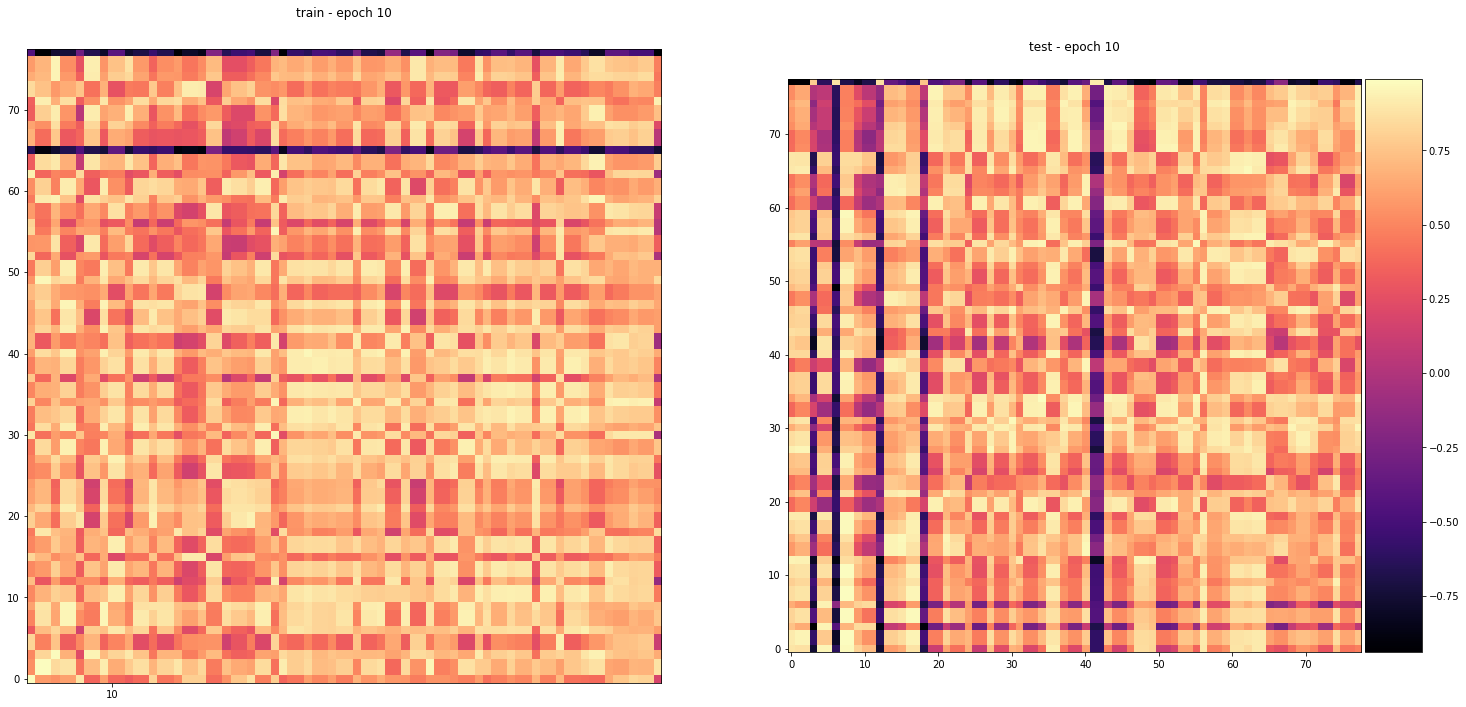

In [121]:
cka_train = torch.load("../runs/cifar10/wideresnet/epoch_cka_svd_perturbed_train.pt",  map_location="cpu")
cka_test = torch.load("../runs/cifar10/wideresnet/epoch_cka_svd_perturbed_test.pt", map_location="cpu")

fig, ax = plt.subplots(1, 2, figsize=(25, 15))


container = []

def _plot_ticks(_ax, _vals):
    y_sums = _vals.sum(dim=1)
    x_sums = _vals.sum(dim=0)
    
    y_ticks = {
        "ticks": [y_sums.argmin(), y_sums.argmax()],
    }
    
    x_ticks = {
        "ticks": [x_sums.argmin(), x_sums.argmax()],
    }
    y_ticks["labels"] = [layers[v] for v in y_ticks["ticks"]]
    x_ticks["labels"] = [layers[v] for v in x_ticks["ticks"]]
    
    y_out = _ax.set_yticks(**y_ticks)
    x_out = _ax.set_xticks(**x_ticks)
    
    return y_out, x_out
    
    
def animate_func(

for ((idx_i, cka_train), (idx_j, cka_test)) in zip(cka_train.items(), cka_test.items()):
    im_0 = ax[0].imshow(cka_train, origin="lower", cmap="magma", interpolation='None')
    im_1 = ax[1].imshow(cka_test, origin="lower", cmap="magma", interpolation='None')
        

    title0 = ax[0].text(0.5,1.05,"train - epoch {}".format(idx_i), 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax[0].transAxes, )
    
    
    # ax0_out_ = _plot_ticks(ax[0], cka_train)
    # ax1_out_ = _plot_ticks(ax[1], cka_test)
    print("on idx_i", idx_i)
    out_val = ax[0].set_xticks([idx_i])

    
    title1 = ax[1].text(0.5,1.05,"test - epoch {}".format(idx_j), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1].transAxes, )

    container.append([im_0, title0, im_1, title1])
    
    if idx_i >= 10:
        break
    

divider = axes_grid1.make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(im_0, cax=cax, orientation='vertical')
    
ani = animation.ArtistAnimation(fig, container, interval=750,
                                repeat_delay=1000)

ani.save("cka_train_vs_test.gif")

IFrame(src="cka_train_vs_test.gif", width=2000, height=1000)

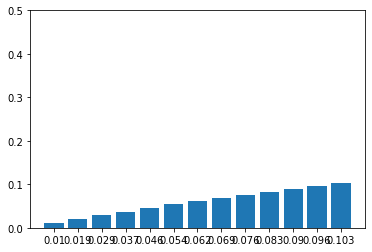

In [133]:
import matplotlib.pyplot as plt
from matplotlib import animation

n=100 #number of frames
l=13  #number of bars

def test_func(k): #just some test function, has no further meaning
    A=[]
    for i in range (l):
        numerator=(i+1)*k
        denominator=(i+k+1)**2+1
        A.append(numerator/float(denominator))
    return A

barlist=[] # the list of bars that is reused in each frame
for i in range(l):
    barlist.append(0)

fig=plt.figure()
ax=plt.axes(xlim=(-1,l),ylim=(0,0.5))  
barchart=ax.bar(range(l),barlist,align='center')
ax.set_xticks(range(l))

def animate_(i):
    y=test_func(i)
    newxticklabels=[]
    for j,x in enumerate(y):
        newxticklabels.append(round(x,3))
    ax.set_xticklabels(newxticklabels)
    for j,h in enumerate(barchart):
        h.set_height(y[j])

anim=animation.FuncAnimation(fig,animate_,repeat=False,frames=n,interval=50)
anim.save("test_ex.gif")

IFrame(src="test_ex.gif", width=2000, height=1000)

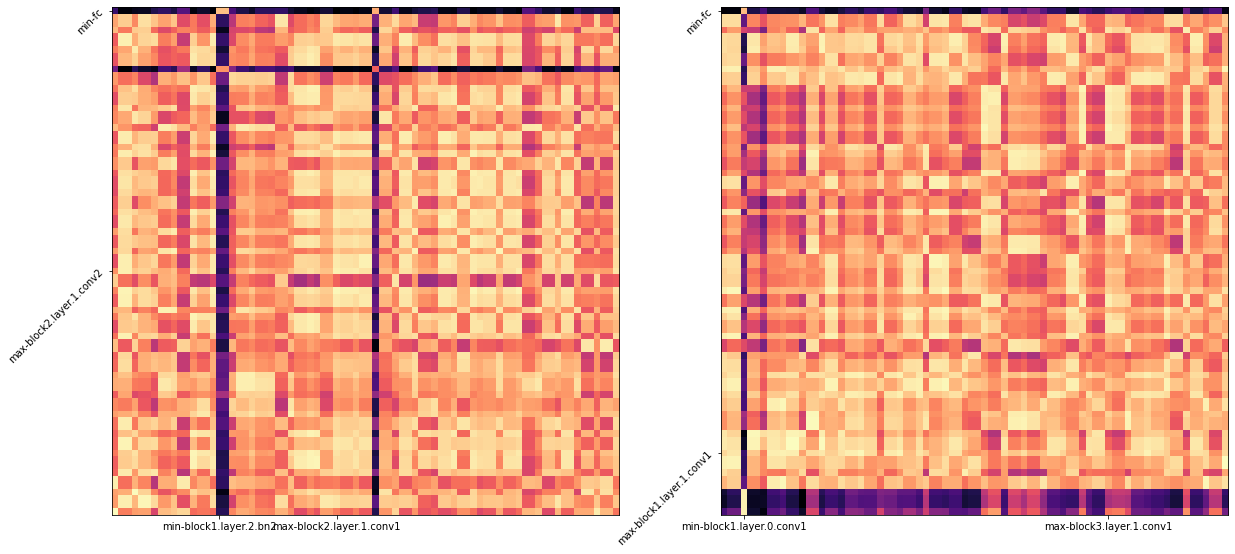

In [4]:
cka_train = torch.load("../runs/cifar10/wideresnet/epoch_cka_svd_perturbed_train.pt",  map_location="cpu")
cka_test = torch.load("../runs/cifar10/wideresnet/epoch_cka_svd_perturbed_test.pt", map_location="cpu")

layers = ['conv1', 'block1.layer.0.bn1', 'block1.layer.0.relu1', 'block1.layer.0.conv1', 'block1.layer.0.bn2', 'block1.layer.0.relu2', 'block1.layer.0.conv2', 'block1.layer.1.bn1', 'block1.layer.1.relu1', 'block1.layer.1.conv1', 'block1.layer.1.bn2', 'block1.layer.1.relu2', 'block1.layer.1.conv2', 'block1.layer.2.bn1', 'block1.layer.2.relu1', 'block1.layer.2.conv1', 'block1.layer.2.bn2', 'block1.layer.2.relu2', 'block1.layer.2.conv2', 'block1.layer.3.bn1', 'block1.layer.3.relu1', 'block1.layer.3.conv1', 'block1.layer.3.bn2', 'block1.layer.3.relu2', 'block1.layer.3.conv2', 'block2.layer.0.bn1', 'block2.layer.0.relu1', 'block2.layer.0.conv1', 'block2.layer.0.bn2', 'block2.layer.0.relu2', 'block2.layer.0.conv2', 'block2.layer.0.convShortcut', 'block2.layer.1.bn1', 'block2.layer.1.relu1', 'block2.layer.1.conv1', 'block2.layer.1.bn2', 'block2.layer.1.relu2', 'block2.layer.1.conv2', 'block2.layer.2.bn1', 'block2.layer.2.relu1', 'block2.layer.2.conv1', 'block2.layer.2.bn2', 'block2.layer.2.relu2', 'block2.layer.2.conv2', 'block2.layer.3.bn1', 'block2.layer.3.relu1', 'block2.layer.3.conv1', 'block2.layer.3.bn2', 'block2.layer.3.relu2', 'block2.layer.3.conv2', 'block3.layer.0.bn1', 'block3.layer.0.relu1', 'block3.layer.0.conv1', 'block3.layer.0.bn2', 'block3.layer.0.relu2', 'block3.layer.0.conv2', 'block3.layer.0.convShortcut', 'block3.layer.1.bn1', 'block3.layer.1.relu1', 'block3.layer.1.conv1', 'block3.layer.1.bn2', 'block3.layer.1.relu2', 'block3.layer.1.conv2', 'block3.layer.2.bn1', 'block3.layer.2.relu1', 'block3.layer.2.conv1', 'block3.layer.2.bn2', 'block3.layer.2.relu2', 'block3.layer.2.conv2', 'block3.layer.3.bn1', 'block3.layer.3.relu1', 'block3.layer.3.conv1', 'block3.layer.3.bn2', 'block3.layer.3.relu2', 'block3.layer.3.conv2', 'bn1', 'relu', 'fc']
fig, axs = plt.subplots(1, 2, figsize=(20, 10))


# heatmap_ = axs.imshow(cka_train[1], origin="lower", cmap="magma", interpolation='None')

ax0 = axs[0].imshow(cka_train[1], origin="lower", cmap="magma", interpolation='None')
ax1 = axs[1].imshow(cka_test[1], origin="lower", cmap="magma", interpolation='None')    

def _tick_labels(_vals):
    y_sums = _vals.sum(dim=1)
    x_sums = _vals.sum(dim=0)
    
    def _f(_sum_vals):
        _argmin, _argmax = _sum_vals.argmin(), _sum_vals.argmax()
        
        return {
            "ticks": [_argmin, _argmax],
            "labels": [f"min-{layers[_argmin]}", f"max-{layers[_argmax]}"],
        }
    
    return _f(x_sums), _f(y_sums)
    

def animate_func(i):
    vals_train = cka_train[i + 1]
    vals_test = cka_test[i + 1]
    ax0= axs[0].imshow(vals_train, origin="lower", cmap="magma", interpolation='None')
    ax0= axs[1].imshow(vals_test, origin="lower", cmap="magma", interpolation='None')

    x_ticks, y_ticks = _tick_labels(vals_train)
    axs[0].set_xticks(**x_ticks)
    axs[0].set_yticks(**y_ticks, rotation=45)
    
    x_ticks, y_ticks = _tick_labels(vals_test)
    axs[1].set_xticks(**x_ticks)
    axs[1].set_yticks(**y_ticks, rotation=45)

    

anim=animation.FuncAnimation(fig,animate_func,repeat=True,frames=len(cka_train) - 1,interval=1500)
anim.save("test_ex.gif")

IFrame(src="test_ex.gif", width=2000, height=1000)


In [5]:
ax0

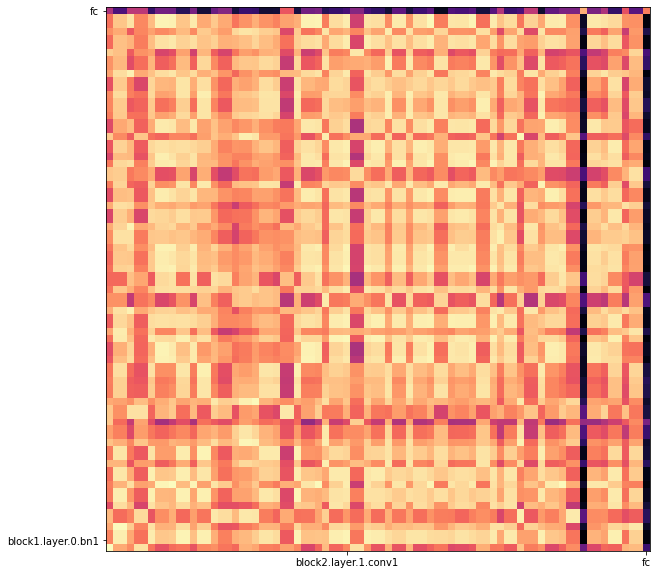

In [108]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))



axs.imshow(cka_train[1], origin="lower", cmap="magma", interpolation='None')

# for m in [y_sums.argmin, y_sums.argmax]:
#     val = m()
#     name = layers[val]
#     axs.set_yticks([val])
#     axs.set_yticklabels([name])
    
y_sums = cka_train[99].sum(dim=1)
x_sums = cka_train[99].sum(dim=0)

y_ticks = {
    "ticks": [y_sums.argmin(), y_sums.argmax()],
    "labels": [layers[y_sums.argmin()], layers[y_sums.argmax()]]
}
    
    
x_ticks = {
    "ticks": [x_sums.argmin(), x_sums.argmax()],
    "labels": [layers[x_sums.argmin()], layers[x_sums.argmax()]]
}

axs.set_yticks(**y_ticks)
axs.set_xticks(**x_ticks)
# x_ticks["ticks"] = [
# for m in [x_sums.argmin, x_sums.argmax]:
#     curr_ticks = axs.get_xticklabels()
    
#     val = m()
#     name = layers[val]
#     axs.set_xticks(axs.get_xticks() + axs.[val])
#     axs.set_xticklabels([name])
    

    
# y_label_min_arg, y_label_max_arg = y_sums.argmin(), y_sums.argmax()
# y_label_min_name, y_label_max_name = layers[y_label_min_arg], layers[y_label_max_arg]


# axs.set_yticks([ y_label_max_arg, y_label_min_arg])
# axs.set_yticklabels([y_label_max_name, y_label_min_name])

In [77]:
cka_train[99][-1, :].sum

tensor([-0.0373, -0.4800, -0.4800,  0.0389,  0.0404,  0.0404, -0.5981, -0.3110,
        -0.3110, -0.3188, -0.6504, -0.6504, -0.2853, -0.7477, -0.7477, -0.3355,
        -0.2214, -0.2214, -0.7298, -0.5730, -0.5730, -0.5870, -0.7590, -0.7590,
        -0.7523,  0.2771,  0.2771, -0.7215, -0.3100, -0.3100, -0.2692, -0.6576,
        -0.5795, -0.5795, -0.5131, -0.2075, -0.2075, -0.5198, -0.6033, -0.6033,
        -0.7555, -0.4024, -0.4024, -0.7245, -0.5512, -0.5512, -0.4290, -0.8362,
        -0.8362, -0.4671, -0.5084, -0.5084, -0.4342, -0.7322, -0.7322, -0.4400,
         0.0021, -0.5641, -0.5641, -0.4955,  0.0559,  0.0559, -0.7842, -0.3872,
        -0.3872, -0.2628, -0.2624, -0.2624,  0.6555, -0.2722, -0.2722, -0.0321,
        -0.5975, -0.5975,  0.2533, -0.4319, -0.4319,  0.4517])

In [78]:
cka_train[99][-1, :].sum()

tensor(-30.9789)

In [82]:
cka_train[99].sum(dim=1)

tensor([ 34.0767,  55.0324,  55.0324,  48.9193,  38.4348,  38.4348,  45.2880,
         51.6435,  51.6435,  52.2379,  52.3707,  52.3707,  40.3151,  48.5694,
         48.5694,  47.4186,  36.1470,  36.1470,  18.3458,  40.1556,  40.1556,
         47.9913,  44.5158,  44.5158,  42.5083,  45.9425,  45.9425,  49.9049,
         48.0448,  48.0448,  54.1102,  40.9182,  52.6663,  52.6663,  49.8622,
         32.2847,  32.2847,  53.9198,  40.7005,  40.7005,  54.3464,  52.2023,
         52.2023,  53.0058,  46.6403,  46.6403,  47.9129,  48.0013,  48.0013,
         42.8972,  49.9160,  49.9160,  46.8844,  32.9127,  32.9127,  53.1566,
         49.0238,  51.8577,  51.8577,  37.8923,  47.9723,  47.9723,  49.0514,
         43.0884,  43.0884,  50.2190,  47.8168,  47.8168,  52.2421,  39.9566,
         39.9566,  33.1238,  53.0945,  53.0945,  43.7238,  52.0392,  52.0392,
        -30.9789])